# Classification Problem -- Logistic Regression

<font color = 'green'>What happens in logistic regression is we have a bunch of data, and with the data we try to build an equation to do classification for us.</font> The regression aspects means that we try to find a best-fit set of parameters.

Finding the best fit is similar to regression, and in this method it’s how we train our classifier. We’ll use **optimization algorithms to find these best-fit parameters**. This best-fit stuff is where the name regression comes from. 


## 1. Classification with logistic regression and the sigmoid function: a tractable step function

We want an equation that could give all of features and predict the class. In the two-class case, the function will spit out a 0 or a 1, called Heaviside step function or sometimes just the step function. 

The problem with the Heaviside step function is that at the point where it steps from 0 to 1, it does so instantly. This instantaneous step is sometimes difficult to deal with. There’s another function that behaves in a similar fashion, but it’s much easier to deal with mathematically. This function is called the <font color = 'red'>**sigmoid**</font>. The sigmoid is given by the following equation:
<font color = 'red'>$$\sigma(z) = \frac{1}{1+e^{-z}}$$</font>

图像是y轴上缓缓从0变成了1，x=0时，y=0.5。

For the logistic regression classifier, we’ll <font color = 'green'>take our features and multiply each one by a weight and then add them up as z</font>. This result will be put into the sigmoid, and we’ll <font color = 'green'>get a number between 0 and 1 as $\sigma(z)$</font>. Anything <font color = 'green'>above 0.5 we’ll classify as 1</font>, and anything <font color = 'green'>below 0.5 we’ll classify as a 0</font>. You can also think of logistic regression as a probability estimate.

## 2. Using optimization to find the best regression coefficients
<br>
<font size = 3.5>The input to the sigmoid function described will be z, where z is given by the following:
$$z = w_0x_0 + w_1x_1 +w_2x_2 +...+ w_nx_n$$
In vector notation we can write this as <font color = 'red'>$z=w^Tx$</font>.
<br><br>
The vector x is our input data, and we want to find the best coefficients w, so that this classifier will be as successful as possible. In order to do that, we need to consider some ideas from optimization theory.
</font>

### 2.1 Gradient ascent 梯度上升

The first optimization algorithm we’re going to look at is called gradient ascent. Gradient ascent is based on the idea that if we want to find the maximum point on a function, then **the best way to move is in the direction of the gradient**. 
<br><br>
We write the gradient with the symbol $\bigtriangledown$ and the gradient of a function $f(x,y)$ is given by the equation
<br><br>
$$\bigtriangledown f(x,y) = \left(\begin{array}{c} \frac{\partial f(x,y)}{\partial x} \\ \frac{\partial f(x,y)}{\partial y} \end{array}\right)$$
<br><br>
The gradient ascent algorithm takes a step in the direction given by the gradient. The gradient operator will always point in the direction of the greatest increase. We’ve talked about direction, but I didn’t mention anything to do with **magnitude of movement**(移动量). The magnitude, or step size, we’ll take is given by the parameter $\alpha$. In vector notation we can write the **gradient ascent algorithm** as
<br><br>
<font color = 'red'>$$w := w + \alpha \bigtriangledown_w f(w)$$</font>

### 2.2 Train: using gradient ascent to find the best parameters

There are 100 data points and each point has two numeric features: <font color = 'blue'>$X_1$ and $X_2$</font>. We’ll try to use gradient ascent to fit the best parameters for the logistic regression model to our data. In addition, this sets the value of <font color = 'blue'>$X_0$</font> to 1.0, which is a convention we use.

1.Start with the weights all set to 1.

2.Repeat R number of times: 

(1)Calculate the gradient of the entire dataset; 

(2)Update the weights vector by alpha*gradient;

(3)Return the weights vector.


In [1]:
import numpy as np

def load_dataset():
    data_mat = []
    label_mat = []
    fr = open('/Users/jbian/Desktop/CU-life/summerlearning/mlinaction/dataset/testSet_chap5.txt')
    for line in fr.readlines():
        line_arr = line.strip().split()
        data_mat.append([1.0, float(line_arr[0]), float(line_arr[1])])  #X0 was set to 1.0
        label_mat.append(int(line_arr[2]))
    return data_mat, label_mat


def sigmoid(x):
    return 1.0/(1+np.exp(-x))


def grad_ascent(data_mat, class_labels):
    data_matrix = np.mat(data_mat)                 #convert to NumPy matrix
    label_mat = np.mat(class_labels).transpose()   #convert to NumPy matrix
    m,n = np.shape(data_matrix)
    alpha = 0.001
    max_cycles = 500
    weights = np.ones((n,1))
    for k in range(max_cycles):                 #heavy on matrix operations
        h = sigmoid(data_matrix*weights)        #matrix multiplication
                                                #如果之前没有变成matrix，则*代表逐个元素相乘，dot才代表矩阵乘
        error = (label_mat - h)                 #vector subtraction
        weights = weights + alpha * data_matrix.transpose()* error      #matrix multiplication
    return weights


In [2]:
# 理解一下数据格式

fr = open('/Users/jbian/Desktop/CU-life/summerlearning/mlinaction/dataset/testSet_chap5.txt')
print(fr)

for line in fr.readlines():
    print(line)

<_io.TextIOWrapper name='/Users/jbian/Desktop/CU-life/summerlearning/mlinaction/dataset/testSet_chap5.txt' mode='r' encoding='UTF-8'>
-0.017612	14.053064	0

-1.395634	4.662541	1

-0.752157	6.538620	0

-1.322371	7.152853	0

0.423363	11.054677	0

0.406704	7.067335	1

0.667394	12.741452	0

-2.460150	6.866805	1

0.569411	9.548755	0

-0.026632	10.427743	0

0.850433	6.920334	1

1.347183	13.175500	0

1.176813	3.167020	1

-1.781871	9.097953	0

-0.566606	5.749003	1

0.931635	1.589505	1

-0.024205	6.151823	1

-0.036453	2.690988	1

-0.196949	0.444165	1

1.014459	5.754399	1

1.985298	3.230619	1

-1.693453	-0.557540	1

-0.576525	11.778922	0

-0.346811	-1.678730	1

-2.124484	2.672471	1

1.217916	9.597015	0

-0.733928	9.098687	0

-3.642001	-1.618087	1

0.315985	3.523953	1

1.416614	9.619232	0

-0.386323	3.989286	1

0.556921	8.294984	1

1.224863	11.587360	0

-1.347803	-2.406051	1

1.196604	4.951851	1

0.275221	9.543647	0

0.470575	9.332488	0

-1.889567	9.542662	0

-1.527893	12.150579	0

-1.185247	11.3

In [3]:
# load dataset
data_arr, label_mat = load_dataset()
print(data_arr[:10])
print(label_mat[:10])


# 理解一下Numpy matrix
data_matrix = np.mat(data_arr)
print(data_matrix[:10])
print(np.shape(data_matrix))
label_mat = np.mat(label_mat).transpose() 
print(np.shape(label_mat))

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743]]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0]
[[ 1.       -0.017612 14.053064]
 [ 1.       -1.395634  4.662541]
 [ 1.       -0.752157  6.53862 ]
 [ 1.       -1.322371  7.152853]
 [ 1.        0.423363 11.054677]
 [ 1.        0.406704  7.067335]
 [ 1.        0.667394 12.741452]
 [ 1.       -2.46015   6.866805]
 [ 1.        0.569411  9.548755]
 [ 1.       -0.026632 10.427743]]
(100, 3)
(100, 1)


In [4]:
# calculate weights
data_arr, label_mat = load_dataset()
grad_ascent(data_arr, label_mat)
weights = grad_ascent(data_arr, label_mat)
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


### 2.3 Analyze: plotting the decision boundary

In [5]:
def plot_best_fit(weights):
    import matplotlib.pyplot as plt
    data_mat, label_mat = load_dataset()
    weights = np.asarray(weights)         # return self as an ndarray object; equivalent to np.asarray(self).
    data_arr = np.array(data_mat)
    n = np.shape(data_arr)[0] 
    x_cord1 = []
    y_cord1 = []
    x_cord2 = []
    y_cord2 = []
    for i in range(n):
        if int(label_mat[i])== 1:    # class 1--red, mark--s; class 2--green
            x_cord1.append(data_arr[i,1])
            y_cord1.append(data_arr[i,2])
        else:
            x_cord2.append(data_arr[i,1])
            y_cord2.append(data_arr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_cord1, y_cord1, s=30, c='red', marker='s')
    ax.scatter(x_cord2, y_cord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()



In [6]:
plot_best_fit(weights)

<Figure size 640x480 with 1 Axes>

In [7]:
# 关于np.arange

x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

### 2.4 Train: Stochastic Gradient Ascent 随机梯度上升
The previous optimization algorithm, gradient ascent, uses the whole dataset on each update. This was fine with 100 examples, but with billions of data points containing thousands of features. An alternative to this method is to update the weights using **only one instance at a time**. (只用一个样本点更新回归系数)

Stochastic gradient ascent is an example of an online learning algorithm. This is known as **online**(在线学习) because we can incrementally update the classifier as new data comes in rather than all at once. The all-at-once method is known as <font color = 'red'>**batch processing**(批处理)</font>.


In [8]:
def stoc_grad_ascent(data_mat, class_labels):
    m,n = np.shape(data_mat)
    alpha = 0.01
    weights = np.ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(data_mat[i]*weights))
        error = class_labels[i] - h
        weights = weights + alpha * error * np.asarray(data_mat[i])
    return weights

[ 1.01702007  0.85914348 -0.36579921]


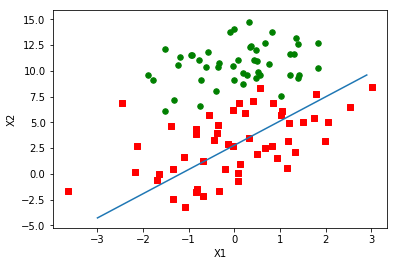

In [9]:
data_arr, label_mat = load_dataset()
weights = stoc_grad_ascent(data_arr, label_mat)
print(weights)
plot_best_fit(weights)

We could see that the result of classification is not as good as before. However, directly comparing the stochastic gradient ascent algorithm to the gradient ascent is unfair, because the gradient ascent code had 500 iterations over the entire dataset.

Now, we do some changes to present SDG.

In [10]:
def stoc_grad_ascent_iter(data_mat, class_labels, num_iter=150):
    m,n = np.shape(data_mat)
    weights = np.ones(n)   #initialize to all ones
    for j in range(num_iter):
        data_index = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001                                #alpha decreases with iteration, does not 
            rand_index = int(np.random.uniform(0,len(data_index)))    #go to 0 because of the constant
            h = sigmoid(sum(data_mat[rand_index]*weights))
            error = class_labels[rand_index] - h
            weights = np.asarray(weights)
            weights = weights + alpha * error * np.asarray(data_mat[rand_index])
            del(data_index[rand_index])
    return weights

The first thing to note is that alpha changes on each iteration. Alpha decreases as the number of iterations increases, but it never reaches 0 because there’s a constant term so that after a large number of cycles, new data still has some impact. 

Alpha function is that it decreases by 1/(j+i). Notice that j is the index of the number of times you go through the dataset, and i is the index of the example in the training set. This gives an alpha that isn’t strictly decreasing when j<<max(i). 

The second improvement is that we randomly select each instance to use in updating the weights. This will reduce the periodic variations(周期性波动). The way you randomly select a value from a list of integers and then delete it from the list.

[13.75567215  0.84235181 -2.07455889]


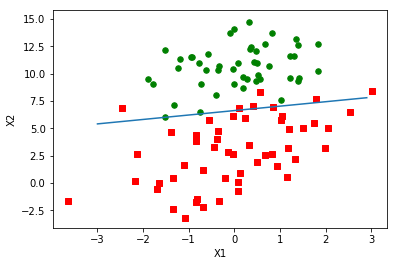

In [11]:
data_arr, label_mat = load_dataset()
weights = stoc_grad_ascent_iter(data_arr, label_mat)
print(weights)
plot_best_fit(weights)

## 3. Example: estimating horse fatalities from colic 从疝气病症预测病马的死亡率
### 3.1 Prepare: dealing with missing values in the data

--Use the feature’s mean value from all the available data.

--Fill in the unknown with a special value like -1.

--Ignore the instance.

--Use a mean value from similar items.

--Use another machine learning algorithm to predict the value.

Here, we replace missing values with 0, because 0 makes weights = weights via the update process and we delete data if missing label appears. And the data after preprocessing saved as horseColicTest.txt and horseColicTraining.txt.

### 3.2 Test: classifying with logistic regression

In [12]:
def classify_vector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: 
        return 1.0
    else: 
        return 0.0

def colic_test():
    fr_train = open('/Users/jbian/Desktop/CU-life/summerlearning/mlinaction/dataset/horse/horseColicTraining.txt')
    fr_test = open('/Users/jbian/Desktop/CU-life/summerlearning/mlinaction/dataset/horse/horseColicTest.txt')
    training_set = []
    training_labels = []
    for line in fr_train.readlines():
        curr_line = line.strip().split('\t')
        line_arr =[]
        for i in range(21):            # 100个样本 20个特征 第21列为label
            line_arr.append(float(curr_line[i]))
        training_set.append(line_arr)
        training_labels.append(float(curr_line[21]))
    train_weights = stoc_grad_ascent_iter(np.array(training_set), training_labels, 1000)
    error_count = 0
    num_test_vec = 0.0
    for line in fr_test.readlines():
        num_test_vec += 1.0
        curr_line = line.strip().split('\t')
        line_arr =[]
        for i in range(21):
            line_arr.append(float(curr_line[i]))
        if int(classify_vector(np.array(line_arr), train_weights))!= int(curr_line[21]):
            error_count += 1
    error_rate = (float(error_count)/num_test_vec)
    print('the error rate of this test is: %f' % error_rate)
    return error_rate

def multi_test(num_tests = 10):
    error_sum = 0.0
    for k in range(num_tests):
        error_sum += colic_test()
    print('after %d iterations the average error rate is: %f' % (num_tests, error_sum/float(num_tests)))
        

In [13]:
multi_test(50)

/Users/jbian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


the error rate of this test is: 0.313433
the error rate of this test is: 0.298507
the error rate of this test is: 0.313433
the error rate of this test is: 0.432836
the error rate of this test is: 0.328358
the error rate of this test is: 0.402985
the error rate of this test is: 0.328358
the error rate of this test is: 0.402985
the error rate of this test is: 0.388060
the error rate of this test is: 0.417910
the error rate of this test is: 0.388060
the error rate of this test is: 0.343284
the error rate of this test is: 0.417910
the error rate of this test is: 0.328358
the error rate of this test is: 0.373134
the error rate of this test is: 0.268657
the error rate of this test is: 0.328358
the error rate of this test is: 0.298507
the error rate of this test is: 0.268657
the error rate of this test is: 0.238806
the error rate of this test is: 0.388060
the error rate of this test is: 0.373134
the error rate of this test is: 0.328358
the error rate of this test is: 0.358209
the error rate o

Results above are not so bad, because we have around 30% missing data.